In [128]:
from collections import Counter

import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from scipy.stats import spearmanr, pearsonr
from sklearn.cluster import KMeans
from sklearn.metrics import adjusted_rand_score, rand_score
from statsmodels.formula.api import ols


In [10]:
def get_euler_dist(v1, v2):
    vi = np.array(v1).reshape([-1])
    vj = np.array(v2).reshape([-1])
    return np.sqrt(np.sum(np.square(vi - vj)))


def get_cos_similar(v1, v2):
    vi = np.array(v1).reshape([-1])
    vj = np.array(v2).reshape([-1])

    num = float(np.dot(vi, vj))
    denom = np.linalg.norm(vi) * np.linalg.norm(vj)
    return (num / denom) if denom != 0 else 0


def normalization(matrix):
    sum = np.sqrt(np.sum(matrix ** 2, axis=1, keepdims=True))
    nor_matrix = matrix / sum
    return nor_matrix


def spect_decomp_r(df):
    adjacentMatrix = np.array(df)
    degreeMatrix = np.sum(adjacentMatrix, axis=1)
    laplacianMatrix = np.diag(degreeMatrix) - adjacentMatrix
    sqrtDegreeMatrix = np.diag(1.0 / (degreeMatrix ** (0.5)))
    LaplacianMatrix_normalized = np.dot(np.dot(sqrtDegreeMatrix, laplacianMatrix), sqrtDegreeMatrix)
    lam, H = np.linalg.eig(LaplacianMatrix_normalized)

    t = np.argsort(lam)
    H = np.c_[H[:, t[0]], H[:, t[1]]]
    H = np.real(H)

    return H


def spect_decomp_a(df):
    adjacentMatrix = np.array(df)
    degreeMatrix = np.sum(adjacentMatrix, axis=1)
    laplacianMatrix = np.diag(degreeMatrix) - adjacentMatrix
    sqrtDegreeMatrix = np.diag(1.0 / (degreeMatrix ** (0.5)))
    LaplacianMatrix_normalized = np.dot(np.dot(sqrtDegreeMatrix, laplacianMatrix), sqrtDegreeMatrix)
    lam, H = np.linalg.eig(LaplacianMatrix_normalized)

    t = np.argsort(lam)
    H = np.c_[H[:, t[0]], H[:, t[1]]]
    H = np.absolute(H)

    return H


def spect_decomp_r_n(df):
    adjacentMatrix = np.array(df)
    degreeMatrix = np.sum(adjacentMatrix, axis=1)
    laplacianMatrix = np.diag(degreeMatrix) - adjacentMatrix
    sqrtDegreeMatrix = np.diag(1.0 / (degreeMatrix ** (0.5)))
    LaplacianMatrix_normalized = np.dot(np.dot(sqrtDegreeMatrix, laplacianMatrix), sqrtDegreeMatrix)
    lam, H = np.linalg.eig(LaplacianMatrix_normalized)

    t = np.argsort(lam)
    H = np.c_[H[:, t[0]], H[:, t[1]]]
    H = np.real(normalization(H))

    return H


def spect_decomp_a_n(df):
    adjacentMatrix = np.array(df)
    degreeMatrix = np.sum(adjacentMatrix, axis=1)
    laplacianMatrix = np.diag(degreeMatrix) - adjacentMatrix
    sqrtDegreeMatrix = np.diag(1.0 / (degreeMatrix ** (0.5)))
    LaplacianMatrix_normalized = np.dot(np.dot(sqrtDegreeMatrix, laplacianMatrix), sqrtDegreeMatrix)
    lam, H = np.linalg.eig(LaplacianMatrix_normalized)

    t = np.argsort(lam)
    H = np.c_[H[:, t[0]], H[:, t[1]]]
    H = np.absolute(normalization(H))

    return H


def spect_clustering(df, decomp, number=20):
    H = decomp(df)
    model = KMeans(n_clusters=number, n_init='auto', random_state=42)
    model.fit(H)
    labels = model.labels_

    return labels

In [11]:
df_sem = pd.read_csv('./sem_dist.csv')
df_sem.index = list(df_sem['Unnamed: 0'])
df_sem.drop(columns='Unnamed: 0', inplace=True)

df_smi = pd.read_csv('./smi_dist.csv')
df_smi.index = list(df_smi['Unnamed: 0'])
df_smi.drop(columns='Unnamed: 0', inplace=True)

df_ato = pd.read_csv('./ato_dist.csv')
df_ato.index = list(df_ato['Unnamed: 0'])
df_ato.drop(columns='Unnamed: 0', inplace=True)

In [12]:
from sklearn.manifold import TSNE
from sklearn.decomposition import PCA

df_add = pd.read_csv("./rg_smt_smi_atm_geo.csv")
df_add["semantic"] = df_add["semantic"].apply(lambda x: [float(i) for i in x[1:-1].split()])
df_add["smile"] = df_add["smile"].apply(lambda x: [float(i) for i in x[1:-1].split()])
df_add["atomic"] = df_add["atomic"].apply(lambda x: [float(i) for i in x[1:-1].split()])
df_add

,name,word_freq,semantic,smile,atomic,geometric
0,(+)-aspidospermidine,15,"[0.17337348, -0.3568789, 0.03349426, -0.342206...","[-0.744335949, 0.0923662633, -0.357910395, -0....","[-16.981401, -16.848295, -17.021622, -16.97840...",['PATZIW']
1,(-)-Adrenaline,21,"[0.378266782, 0.0607172847, 0.3967686, -0.0202...","[-0.814905405, -0.25902012, 0.0981947482, -0.6...","[-18.417313, -18.03368, -18.445927, -18.368427...",['ADRENL']
2,(-)-Epicatechin,129,"[-0.13416506, 0.02672044, 0.328929, -0.3376658...","[-0.776835263, -0.0564182363, 0.0696076825, -0...","[-18.111425, -16.734394, -18.118, -18.050484, ...",['COWHUR']
3,(-)-Noradrenaline,23,"[0.0655271113, -0.122308001, -0.0707869977, -0...","[-0.79306275, -0.2277208, -0.02243627, -0.2832...","[-18.143618, -17.221077, -18.143715, -18.07799...",['NADREN']
4,(-)-deoxypodophyllotoxin,10,"[0.05425612, -0.5526235, 0.5274869, -0.3697647...","[-0.834411085, 0.137109548, 0.222313315, -0.25...","[-17.632042, -16.738024, -17.664902, -17.60105...","['VAXXOH01', 'YOQXOU']"
...,...,...,...,...,...,...
959,viridicatin,28,"[-0.15006746, -0.912956, 0.22810888, -0.819405...","[-1.22181594, -0.388474464, 0.142942384, 0.059...","[-17.489208, -18.226345, -17.499388, -17.40784...",['DOJHAO01']
960,virosecurinine,45,"[0.00989494, -0.27823803, 0.17010885, -0.44197...","[-0.0739553794, 0.285954088, 0.240951285, -0.3...","[-17.924335, -17.615856, -17.95199, -17.909348...",['FIDTEU']
961,voacamine,64,"[0.38762978, -0.37111285, -0.10875563, -0.5215...","[-0.772047281, -0.0536762737, -0.0230637938, -...","[-17.086731, -17.633154, -17.118664, -17.07161...",['YURFAV']
962,weddellite,281,"[0.15016489, -0.48716843, -0.05625443, 0.07016...","[-0.223173782, 0.052875869, 0.387791097, 0.547...","[-17.957497, -9.687341, -17.9029, -17.919159, ...","['GADTAK', 'WHWLTB01']"


In [13]:

for spect_decomp in [spect_decomp_r, spect_decomp_r_n, spect_decomp_a, spect_decomp_a_n]:
    sem_decomp = spect_decomp(df_sem)
    smi_decomp = spect_decomp(df_smi)
    ato_decomp = spect_decomp(df_ato)

    print("First Egeinvalue")
    print(spearmanr(sem_decomp[:, 0], smi_decomp[:, 0]))
    print(spearmanr(sem_decomp[:, 0], ato_decomp[:, 0]))
    print(spearmanr(smi_decomp[:, 0], ato_decomp[:, 0]))

    print("Second Egeinvalue")
    print(spearmanr(sem_decomp[:, 1], smi_decomp[:, 1]))
    print(spearmanr(sem_decomp[:, 1], ato_decomp[:, 1]))
    print(spearmanr(smi_decomp[:, 1], ato_decomp[:, 1]))



First Egeinvalue
SpearmanrResult(correlation=0.23148866793679707, pvalue=3.411162253079912e-13)
SpearmanrResult(correlation=-0.015288768295977011, pvalue=0.6354265742354167)
SpearmanrResult(correlation=0.2256004737040463, pvalue=1.3705761591978267e-12)
Second Egeinvalue
SpearmanrResult(correlation=-0.18057412657251454, pvalue=1.6448520094257158e-08)
SpearmanrResult(correlation=-0.09037276484455856, pvalue=0.004984522718717473)
SpearmanrResult(correlation=-0.11566077584929729, pvalue=0.0003200579495896716)
First Egeinvalue
SpearmanrResult(correlation=-0.13786918887233385, pvalue=1.7423287705884794e-05)
SpearmanrResult(correlation=-0.03153601984317786, pvalue=0.32801782011875824)
SpearmanrResult(correlation=0.10737606128383058, pvalue=0.0008402542469582367)
Second Egeinvalue
SpearmanrResult(correlation=-0.18288395186859824, pvalue=1.0704030602797767e-08)
SpearmanrResult(correlation=-0.08350136661622685, pvalue=0.009493640656361674)
SpearmanrResult(correlation=-0.12013144042864972, pvalue

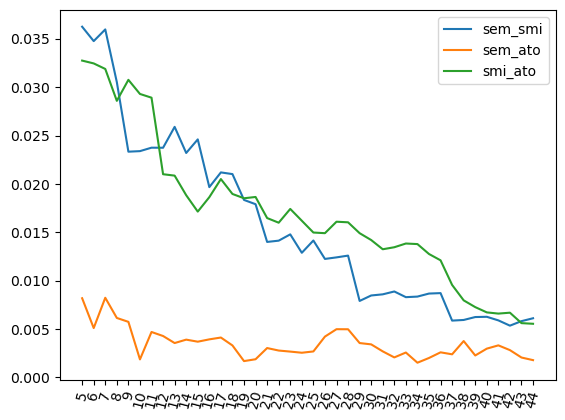

In [47]:
sem_smi = []
sem_ato = []
smi_ato = []

spect_decomp = spect_decomp_r_n

for i in range(5, 45):
    sem_label = spect_clustering(df_sem, spect_decomp, number=i)
    smi_label = spect_clustering(df_smi, spect_decomp, number=i)
    ato_label = spect_clustering(df_ato, spect_decomp, number=i)

    sem_smi.append(adjusted_rand_score(sem_label, smi_label))
    sem_ato.append(adjusted_rand_score(sem_label, ato_label))
    smi_ato.append(adjusted_rand_score(smi_label, ato_label))
plt.plot(range(5, 45), sem_smi, label="sem_smi")
plt.plot(range(5, 45), sem_ato, label="sem_ato")
plt.plot(range(5, 45), smi_ato, label="smi_ato")
plt.xticks(range(5, 45), rotation=75)
plt.legend()
plt.show()

0.03475801096937919 0.005105704721458631 0.032452193959417196
0.7093776795370622 0.7110236424037952 0.7091643937729174


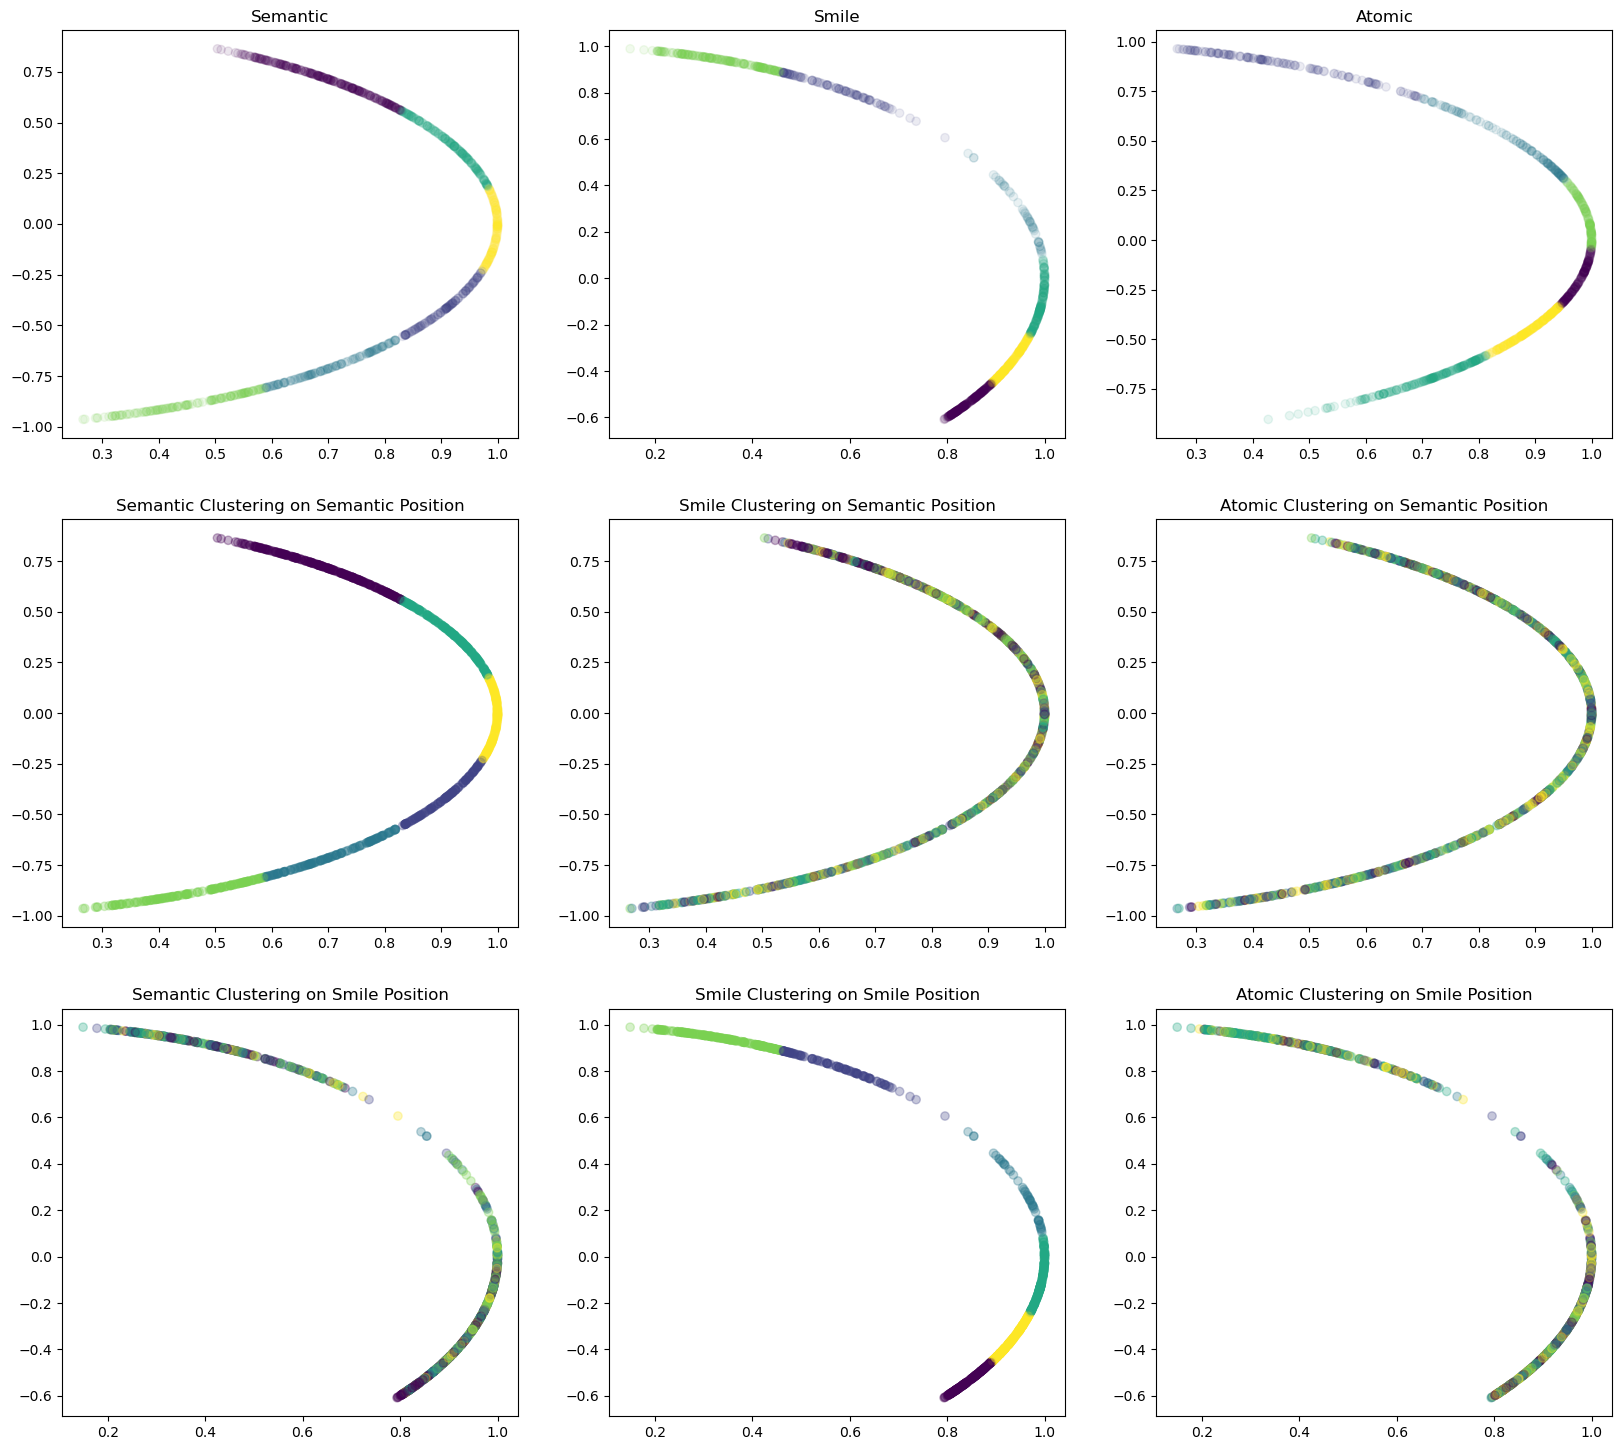

In [26]:
spect_decomp = spect_decomp_r_n

sem_decomp = spect_decomp(df_sem)
smi_decomp = spect_decomp(df_smi)
ato_decomp = spect_decomp(df_ato)

sem_label = spect_clustering(df_sem, spect_decomp, number=6)
smi_label = spect_clustering(df_smi, spect_decomp, number=6)
ato_label = spect_clustering(df_ato, spect_decomp, number=6)

print(adjusted_rand_score(sem_label, smi_label), adjusted_rand_score(sem_label, ato_label),
      adjusted_rand_score(smi_label, ato_label))

print(rand_score(sem_label, smi_label), rand_score(sem_label, ato_label),
      rand_score(smi_label, ato_label))

fig, axes = plt.subplots(3, 3, figsize=(20, 18))
axes[0, 0].set_title('Semantic')
axes[0, 0].scatter(sem_decomp[:, 0], sem_decomp[:, 1], c=sem_label, alpha=0.1)
axes[0, 1].set_title('Smile')
axes[0, 1].scatter(smi_decomp[:, 0], smi_decomp[:, 1], c=smi_label, alpha=0.1)
axes[0, 2].set_title('Atomic')
axes[0, 2].scatter(ato_decomp[:, 0], ato_decomp[:, 1], c=ato_label, alpha=0.1)

axes[1, 0].set_title('Semantic Clustering on Semantic Position')
axes[1, 0].scatter(sem_decomp[:, 0], sem_decomp[:, 1], c=sem_label, alpha=0.3)
axes[1, 1].set_title('Smile Clustering on Semantic Position')
axes[1, 1].scatter(sem_decomp[:, 0], sem_decomp[:, 1], c=smi_label, alpha=0.3)
axes[1, 2].set_title('Atomic Clustering on Semantic Position')
axes[1, 2].scatter(sem_decomp[:, 0], sem_decomp[:, 1], c=ato_label, alpha=0.3)

axes[2, 0].set_title('Semantic Clustering on Smile Position')
axes[2, 0].scatter(smi_decomp[:, 0], smi_decomp[:, 1], c=sem_label, alpha=0.3)
axes[2, 1].set_title('Smile Clustering on Smile Position')
axes[2, 1].scatter(smi_decomp[:, 0], smi_decomp[:, 1], c=smi_label, alpha=0.3)
axes[2, 2].set_title('Atomic Clustering on Smile Position')
axes[2, 2].scatter(smi_decomp[:, 0], smi_decomp[:, 1], c=ato_label, alpha=0.3)
plt.show()

For all four decomposotion,
spect_decomp_r_n has best effect: the best coefficient and the best clustering score.

Semantic Cluster Distribution Standard Error 41.10420362390634
Smile Cluster Distribution Standard Error 64.09281464321012
Atomic Cluster Distribution Standard Error 39.55446315595189


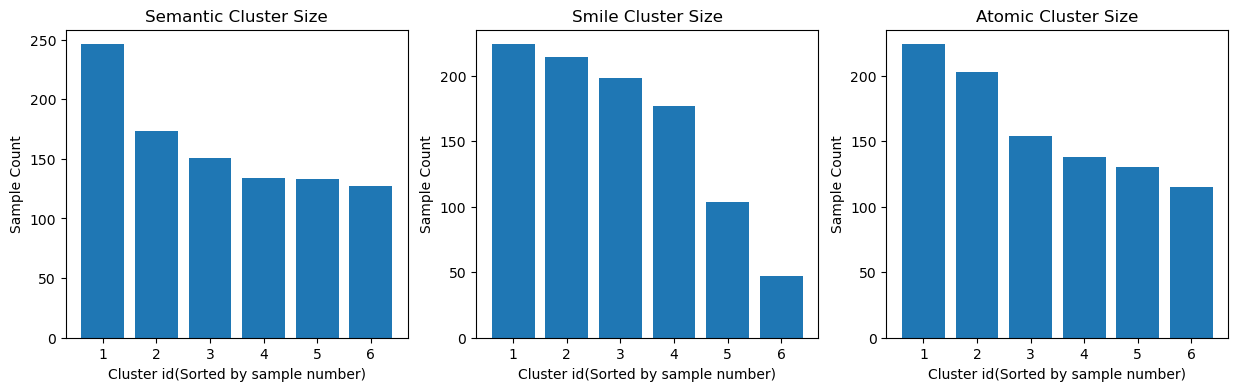

In [162]:
def get_count(labels, mode='Semantic'):
    cnt = Counter(list(labels))
    nums = []
    for k in cnt.keys():
        nums.append(cnt[k])
    print(mode, "Cluster Distribution Standard Error", np.std(np.array(nums)))

    return sorted(nums, reverse=True)


spect_decomp = spect_decomp_r_n

sem_decomp = spect_decomp(df_sem)
smi_decomp = spect_decomp(df_smi)
ato_decomp = spect_decomp(df_ato)

sem_label = spect_clustering(df_sem, spect_decomp, number=6)
smi_label = spect_clustering(df_smi, spect_decomp, number=6)
ato_label = spect_clustering(df_ato, spect_decomp, number=6)
sem_cnt = get_count(sem_label, mode="Semantic")
smi_cnt = get_count(smi_label, mode="Smile")
ato_cnt = get_count(ato_label, mode="Atomic")

fig, axes = plt.subplots(1, 3, figsize=(15, 4), squeeze=True)
axes[0].set_title("Semantic Cluster Size")
axes[0].set_ylabel("Sample Count")
axes[0].set_xlabel("Cluster id(Sorted by sample number)")
axes[0].bar(range(1,7), sem_cnt)
axes[0].set_xticks(range(1,7))
axes[1].set_title("Smile Cluster Size")
axes[1].set_ylabel("Sample Count")
axes[1].set_xlabel("Cluster id(Sorted by sample number)")
axes[1].bar(range(1,7), smi_cnt)
axes[1].set_xticks(range(1,7))
axes[2].set_title("Atomic Cluster Size")
axes[2].set_ylabel("Sample Count")
axes[2].set_xlabel("Cluster id(Sorted by sample number)")
axes[2].bar(range(1,7), ato_cnt)
axes[2].set_xticks(range(1,7))

plt.show()

In [71]:
spect_decomp = spect_decomp_r_n

sem_decomp = spect_decomp(df_sem)
smi_decomp = spect_decomp(df_smi)
ato_decomp = spect_decomp(df_ato)

sem_label = spect_clustering(df_sem, spect_decomp, number=6)
smi_label = spect_clustering(df_smi, spect_decomp, number=6)
ato_label = spect_clustering(df_ato, spect_decomp, number=6)

df_decomp = pd.DataFrame({
    'name': list(df_add.name),
    'word_freq': list(df_add.word_freq),
    'semantic': sem_decomp[:, 1],
    'semantic_label': sem_label,
    'smile': smi_decomp[:, 1],
    'smile_label': smi_label,
    'atomic': ato_decomp[:, 1],
    'atomic_label': ato_label
})
df_decomp.index = list(df_decomp.name)
df_decomp.drop(columns='name', inplace=True)
df_decomp

,word_freq,semantic,semantic_label,smile,smile_label,atomic,atomic_label
(+)-aspidospermidine,15,0.780314,0,-0.240753,3,-0.476292,5
(-)-Adrenaline,21,-0.917128,4,-0.120640,3,-0.356607,5
(-)-Epicatechin,129,-0.849148,4,-0.202792,3,0.336692,2
(-)-Noradrenaline,23,-0.798677,2,0.061852,3,-0.194188,0
(-)-deoxypodophyllotoxin,10,-0.586439,2,-0.130743,3,-0.261547,0
...,...,...,...,...,...,...,...
viridicatin,28,0.163947,5,-0.437078,5,-0.341789,5
virosecurinine,45,-0.782317,2,0.794321,1,-0.426259,5
voacamine,64,-0.816402,4,-0.135752,3,-0.710285,3
weddellite,281,-0.222835,5,0.748456,1,0.937384,1


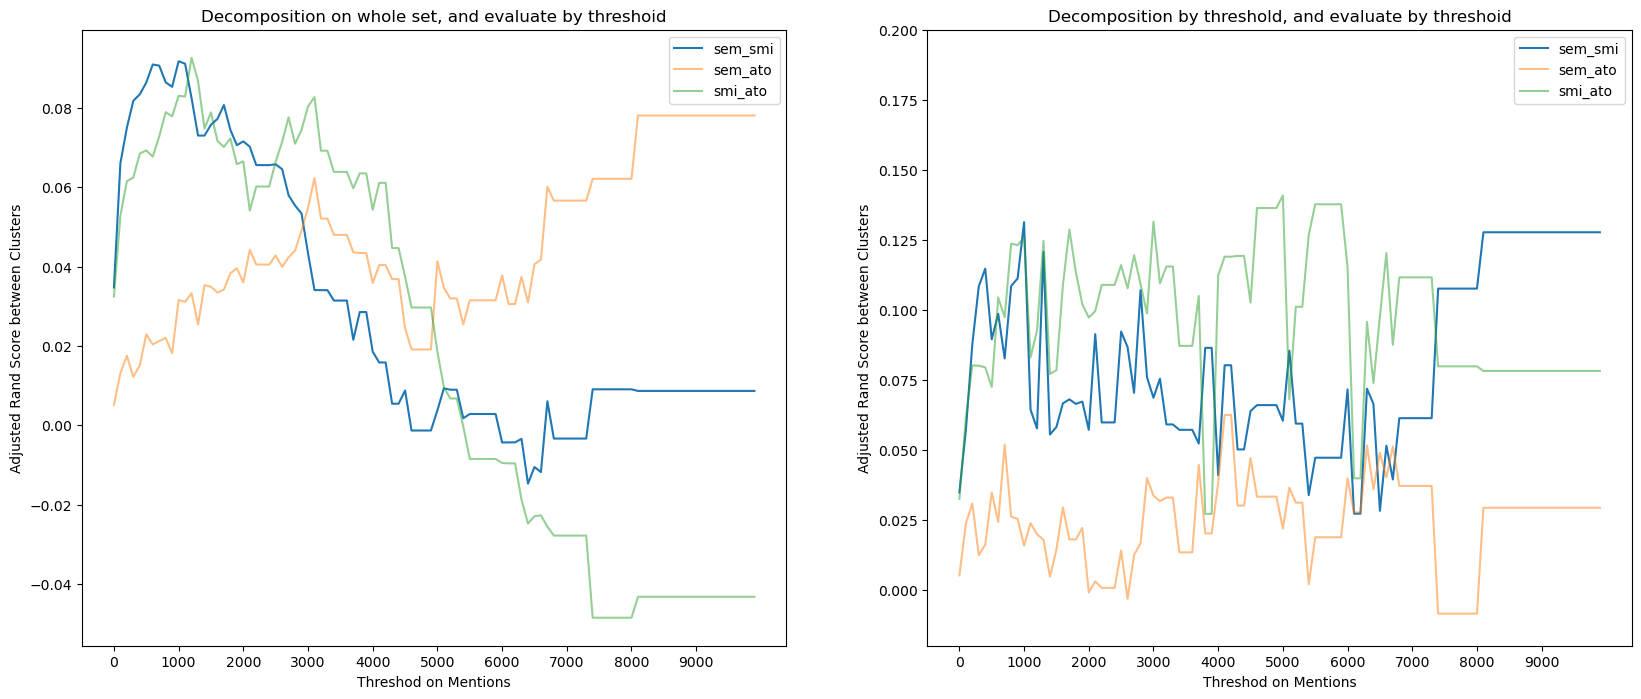

In [150]:
# Analysis the clustering label computed from whole set
fig,axes=plt.subplots(1, 2, figsize=(20, 8))

r_score = adjusted_rand_score

sem_smi = []
sem_ato = []
smi_ato = []

for i in np.arange(0, 10000, 100):
    sem_smi.append(r_score(df_decomp[df_decomp.word_freq >= i].semantic_label,
                           df_decomp[df_decomp.word_freq >= i].smile_label))
    sem_ato.append(r_score(df_decomp[df_decomp.word_freq >= i].semantic_label,
                           df_decomp[df_decomp.word_freq >= i].atomic_label))
    smi_ato.append(r_score(df_decomp[df_decomp.word_freq >= i].smile_label,
                           df_decomp[df_decomp.word_freq >= i].atomic_label))
axes[0].set_title("Decomposition on whole set, and evaluate by threshoid")
axes[0].set_xlabel("Threshod on Mentions")
axes[0].set_ylabel("Adjusted Rand Score between Clusters")
axes[0].plot(np.arange(0, 10000, 100), sem_smi, label="sem_smi", alpha=1)
axes[0].plot(np.arange(0, 10000, 100), sem_ato, label="sem_ato", alpha=0.5)
axes[0].plot(np.arange(0, 10000, 100), smi_ato, label="smi_ato", alpha=0.5)
axes[0].set_xticks(np.arange(0, 10000, 1000))
axes[0].legend()

# Analysis new clustering label computed on subset

sem_smi = []
sem_ato = []
smi_ato = []

spect_decomp = spect_decomp_r_n

r_score = adjusted_rand_score

for i in np.arange(0, 10000, 100):
    chem_list = list(df_add[df_add.word_freq >= i].name)
    sem_label = spect_clustering(df_sem.loc[chem_list, chem_list], spect_decomp, number=6)
    smi_label = spect_clustering(df_smi.loc[chem_list, chem_list], spect_decomp, number=6)
    ato_label = spect_clustering(df_ato.loc[chem_list, chem_list], spect_decomp, number=6)

    sem_smi.append(r_score(sem_label, smi_label))
    sem_ato.append(r_score(sem_label, ato_label))
    smi_ato.append(r_score(smi_label, ato_label))
axes[1].set_title("Decomposition by threshold, and evaluate by threshoid")
axes[1].set_xlabel("Threshod on Mentions")
axes[1].set_ylabel("Adjusted Rand Score between Clusters")
axes[1].plot(np.arange(0, 10000, 100), sem_smi, label="sem_smi", alpha=1)
axes[1].plot(np.arange(0, 10000, 100), sem_ato, label="sem_ato", alpha=0.5)
axes[1].plot(np.arange(0, 10000, 100), smi_ato, label="smi_ato", alpha=0.5)
axes[1].set_xticks(np.arange(0, 10000, 1000))
axes[1].set_ylim((-0.02, 0.2))
axes[1].legend()
plt.show()

In [85]:
thresholds = np.arange(0, 10000, 100)
sp_coefs = np.zeros(len(thresholds))
sp_pvals = np.zeros(len(thresholds))
pr_coefs = np.zeros(len(thresholds))
pr_pvals = np.zeros(len(thresholds))
nrows = np.zeros(len(thresholds))
ncols = np.zeros(len(thresholds))
for i, thr in enumerate(thresholds):
    spect_decomp = spect_decomp_r_n

    filter_list = list(df_add[df_add.word_freq >= thr].name)
    sem_decomp = spect_decomp(df_sem.loc[filter_list, filter_list])
    smi_decomp = spect_decomp(df_smi.loc[filter_list, filter_list])

    sp = spearmanr(sem_decomp[:, 0], smi_decomp[:, 0])
    pr = pearsonr(sem_decomp[:, 0], smi_decomp[:, 0])

    sp_coefs[i] = sp[0]
    sp_pvals[i] = np.log(sp[1]) if sp[1] > 0 else np.nan
    pr_coefs[i] = pr[0]
    pr_pvals[i] = np.log(pr[1]) if pr[1] > 0 else np.nan
    nrows[i] = len(filter_list)

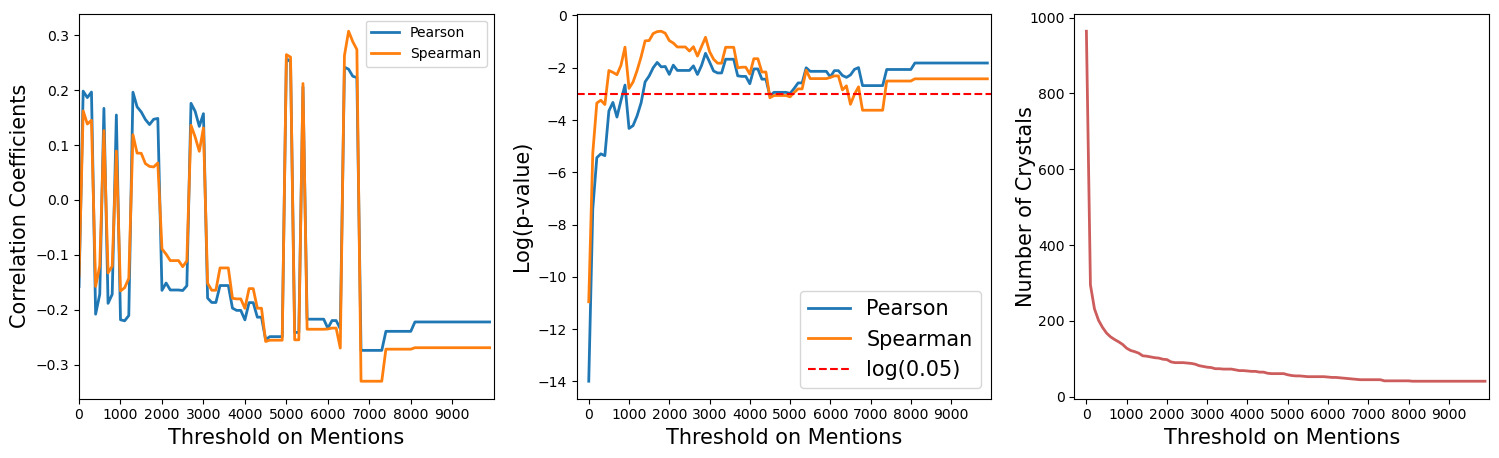

In [153]:
fig, axes = plt.subplots(1, 3, figsize=(12, 5))
axes[0].plot(thresholds, pr_coefs, lw=2, label='Pearson')
axes[0].plot(thresholds, sp_coefs, lw=2, label='Spearman')
axes[0].set_xlim([0, 10000])
axes[0].set_xticks(np.arange(0, 10000, 1000))
axes[0].set_ylabel('Correlation Coefficients', fontsize=15)
axes[0].set_xlabel('Threshold on Mentions', fontsize=15)
axes[0].legend(fontsize=10, loc=1)

axes[1].plot(thresholds, pr_pvals, lw=2, label='Pearson')
axes[1].plot(thresholds, sp_pvals, lw=2, label='Spearman')
axes[1].axhline(y=np.log(0.05), color='r', ls='--', label='log(0.05)')
axes[1].set_xlim([-300, 10000])
axes[1].set_xticks(np.arange(0, 10000, 1000))
axes[1].set_ylabel('Log(p-value)', fontsize=15)
axes[1].set_xlabel('Threshold on Mentions', fontsize=15)
axes[1].legend(fontsize=15, loc=4)

axes[2].plot(thresholds, nrows, lw=2, color='indianred', label='No. Columns')
axes[2].set_xlim([-300, 10000])
axes[2].set_xticks(np.arange(0, 10000, 1000))
axes[2].set_ylabel('Number of Crystals', fontsize=15, labelpad=-5)
axes[2].set_xlabel('Threshold on Mentions', fontsize=15)

plt.subplots_adjust(right=1.3)

In [163]:
thresholds = np.arange(0, 10000, 100)
sp_coefs = np.zeros(len(thresholds))
sp_pvals = np.zeros(len(thresholds))
pr_coefs = np.zeros(len(thresholds))
pr_pvals = np.zeros(len(thresholds))
nrows = np.zeros(len(thresholds))
ncols = np.zeros(len(thresholds))
for i, thr in enumerate(thresholds):
    spect_decomp = spect_decomp_r_n

    filter_list = list(df_add[df_add.word_freq >= thr].name)
    sem_decomp = spect_decomp(df_sem.loc[filter_list, filter_list])
    smi_decomp = spect_decomp(df_smi.loc[filter_list, filter_list])

    sp = spearmanr(sem_decomp[:, 1], smi_decomp[:, 0])
    pr = pearsonr(sem_decomp[:, 1], smi_decomp[:, 0])

    sp_coefs[i] = sp[0]
    sp_pvals[i] = np.log(sp[1]) if sp[1] > 0 else np.nan
    pr_coefs[i] = pr[0]
    pr_pvals[i] = np.log(pr[1]) if pr[1] > 0 else np.nan
    nrows[i] = len(filter_list)

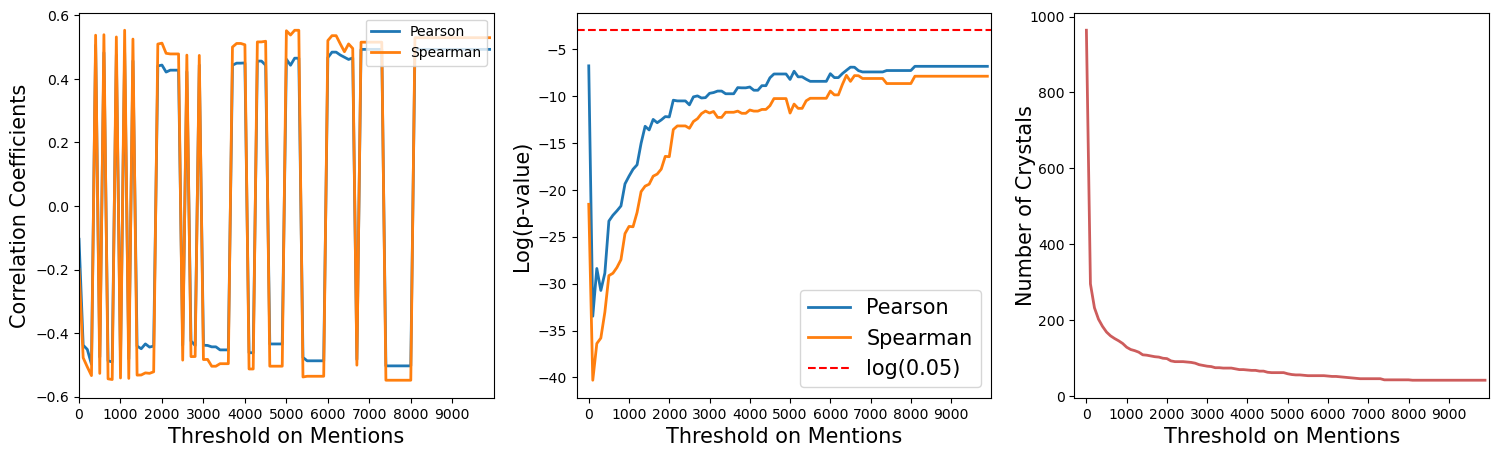

In [164]:
fig, axes = plt.subplots(1, 3, figsize=(12, 5))
axes[0].plot(thresholds, pr_coefs, lw=2, label='Pearson')
axes[0].plot(thresholds, sp_coefs, lw=2, label='Spearman')
axes[0].set_xlim([0, 10000])
axes[0].set_xticks(np.arange(0, 10000, 1000))
axes[0].set_ylabel('Correlation Coefficients', fontsize=15)
axes[0].set_xlabel('Threshold on Mentions', fontsize=15)
axes[0].legend(fontsize=10, loc=1)

axes[1].plot(thresholds, pr_pvals, lw=2, label='Pearson')
axes[1].plot(thresholds, sp_pvals, lw=2, label='Spearman')
axes[1].axhline(y=np.log(0.05), color='r', ls='--', label='log(0.05)')
axes[1].set_xlim([-300, 10000])
axes[1].set_xticks(np.arange(0, 10000, 1000))
axes[1].set_ylabel('Log(p-value)', fontsize=15)
axes[1].set_xlabel('Threshold on Mentions', fontsize=15)
axes[1].legend(fontsize=15, loc=4)

axes[2].plot(thresholds, nrows, lw=2, color='indianred', label='No. Columns')
axes[2].set_xlim([-300, 10000])
axes[2].set_xticks(np.arange(0, 10000, 1000))
axes[2].set_ylabel('Number of Crystals', fontsize=15, labelpad=-5)
axes[2].set_xlabel('Threshold on Mentions', fontsize=15)

plt.subplots_adjust(right=1.3)

In [147]:
thre_s = range(0,8000,500)
results=[]
for i, n in enumerate(thre_s):
    thr = n
    spect_decomp = spect_decomp_r_n
    filter_list = list(df_add[df_add.word_freq >= thr].name)
    word_fq = list(df_add[df_add.word_freq >= thr].word_freq)

    sem_decomp = spect_decomp(df_sem.loc[filter_list, filter_list])
    smi_decomp = spect_decomp(df_smi.loc[filter_list, filter_list])
    ato_decomp = spect_decomp(df_ato.loc[filter_list, filter_list])

    sem_label = spect_clustering(df_sem.loc[filter_list, filter_list], spect_decomp, number=6)
    smi_label = spect_clustering(df_smi.loc[filter_list, filter_list], spect_decomp, number=6)
    ato_label = spect_clustering(df_ato.loc[filter_list, filter_list], spect_decomp, number=6)

    df_decomp_thre = pd.DataFrame({
        'name': filter_list,
        'freq': word_fq,
        'semantic_1': sem_decomp[:, 0],
        'semantic_2': sem_decomp[:, 1],
        'semantic_label': sem_label,
        'smile_1': smi_decomp[:, 0],
        'smile_2': smi_decomp[:, 1],
        'smile_label': smi_label,
        'atomic_1': ato_decomp[:, 0],
        'atomic_2': ato_decomp[:, 1],
        'atomic_label': ato_label
    })

    for m in thre_s[i:]:
        df_decomp_thre = df_decomp_thre[df_decomp_thre.freq >= m]
        mdl1 = ols("semantic_1 ~  smile_1+smile_2+atomic_1+atomic_2", data=df_decomp_thre).fit()
        mdl2 = ols("semantic_2 ~  smile_1+smile_2+atomic_1+atomic_2", data=df_decomp_thre).fit()

        results.append((n,m,mdl1.rsquared_adj,mdl2.rsquared_adj))

results

[(0, 0, 0.04632074348192994, 0.1311001141989806),
 (0, 500, 0.3097447231789262, 0.31748924774583576),
 (0, 1000, 0.3696755979570743, 0.3555228463949015),
 (0, 1500, 0.2894136937289684, 0.39814742071181497),
 (0, 2000, 0.287670698077346, 0.3849579139997391),
 (0, 2500, 0.27406993288564796, 0.41190347095786795),
 (0, 3000, 0.2591980914072529, 0.3633020942238898),
 (0, 3500, 0.238430639562898, 0.33371869540164223),
 (0, 4000, 0.22368012558278405, 0.32644585136959126),
 (0, 4500, 0.21092515091248054, 0.2719461660352199),
 (0, 5000, 0.2207377714747616, 0.30603212820721415),
 (0, 5500, 0.30720674411837756, 0.3576881242715815),
 (0, 6000, 0.3037242369574963, 0.35280600597052136),
 (0, 6500, 0.3102151160494815, 0.3410436796190266),
 (0, 7000, 0.31975971284333626, 0.38193143322582),
 (0, 7500, 0.3442812696075389, 0.38299772570912216),
 (500, 500, 0.032336510644927485, 0.3143766445572028),
 (500, 1000, 0.022869750703419678, 0.36505034000155545),
 (500, 1500, 0.00801363295269042, 0.33833328755420

In [148]:
thr = 0
spect_decomp = spect_decomp_r_n
filter_list = list(df_add[df_add.word_freq >= thr].name)
word_fq = list(df_add[df_add.word_freq >= thr].word_freq)

sem_decomp = spect_decomp(df_sem.loc[filter_list, filter_list])
smi_decomp = spect_decomp(df_smi.loc[filter_list, filter_list])
ato_decomp = spect_decomp(df_ato.loc[filter_list, filter_list])

sem_label = spect_clustering(df_sem.loc[filter_list, filter_list], spect_decomp, number=6)
smi_label = spect_clustering(df_smi.loc[filter_list, filter_list], spect_decomp, number=6)
ato_label = spect_clustering(df_ato.loc[filter_list, filter_list], spect_decomp, number=6)

df_decomp_thre = pd.DataFrame({
    'name': filter_list,
    'freq': word_fq,
    'semantic_1': sem_decomp[:, 0],
    'semantic_2': sem_decomp[:, 1],
    'semantic_label': sem_label,
    'smile_1': smi_decomp[:, 0],
    'smile_2': smi_decomp[:, 1],
    'smile_label': smi_label,
    'atomic_1': ato_decomp[:, 0],
    'atomic_2': ato_decomp[:, 1],
    'atomic_label': ato_label
})

df_decomp_thre = df_decomp_thre[df_decomp_thre.freq >= 7500]
mdl1 = ols("semantic_1 ~  smile_1+smile_2+atomic_1+atomic_2", data=df_decomp_thre).fit()
mdl2 = ols("semantic_2 ~  smile_1+smile_2+atomic_1+atomic_2", data=df_decomp_thre).fit()

print(mdl1.summary())
print(mdl2.summary())

                            OLS Regression Results                            
Dep. Variable:             semantic_1   R-squared:                       0.408
Model:                            OLS   Adj. R-squared:                  0.344
Method:                 Least Squares   F-statistic:                     6.382
Date:                Tue, 09 May 2023   Prob (F-statistic):           0.000521
Time:                        16:03:48   Log-Likelihood:                 6.3933
No. Observations:                  42   AIC:                            -2.787
Df Residuals:                      37   BIC:                             5.902
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      1.3453      0.325      4.136      0.0

In [79]:
print("Classified by Semantic\n")
for i in range(6):
    print("The {}th Cluster: ".format(i))
    print(list(df_decomp[df_decomp.semantic_label == i].sort_values(by='word_freq', ascending=False).head().index),
          '\n')

Classified by Semantic

The 0th Cluster: 
['L1', 'porphyrin', 'pyridine', 'thiourea', 'imine'] 

The 1th Cluster: 
['s', 'urea', 'glycine', 'purine', 'chitin'] 

The 2th Cluster: 
['ethanol', 'glutathione', 'inosine', 'pentachlorophenol', 'epicatechin'] 

The 3th Cluster: 
['acetonitrile', 'toluene', 'pyrimidine', 'indole', '2b'] 

The 4th Cluster: 
['No', 'progesterone', 'sucrose', 'metformin', 'curcumin'] 

The 5th Cluster: 
['C', 'chitosan', 'biotin', 'fluorescein', 'adenine'] 



In [80]:
print("Classified by Smile")
for i in range(6):
    print("The {}th Cluster: ".format(i))
    print(list(df_decomp[df_decomp.smile_label == i].sort_values(by='word_freq', ascending=False).head().index), '\n')

Classified by Smile
The 0th Cluster: 
['toluene', 'fluorescein', 'porphyrin', 'pyridine', 'pyrimidine'] 

The 1th Cluster: 
['progesterone', 'sucrose', 'chitosan', 'metformin', 'oxaliplatin'] 

The 2th Cluster: 
['cimetidine', 'ropivacaine', '2b', 'mifepristone', 'inosine'] 

The 3th Cluster: 
['ibuprofen', 'acetaminophen', 'olanzapine', 'metoprolol', 'deltamethrin'] 

The 4th Cluster: 
['C', 'No', 's', 'ethanol', 'urea'] 

The 5th Cluster: 
['curcumin', 'purine', 'adenine', 'carbamazepine', 'diclofenac'] 



In [81]:
print("Classified by Atomic")
for i in range(6):
    print("The {}th Cluster: ".format(i))
    print(list(df_decomp[df_decomp.atomic_label == i].sort_values(by='word_freq', ascending=False).head().index), '\n')

Classified by Atomic
The 0th Cluster: 
['L1', 'pyridine', 'pyrimidine', 'coumarin', 'anthracene'] 

The 1th Cluster: 
['metformin', 'oxaliplatin', 'calcite', 'pentachlorophenol', 'thiamethoxam'] 

The 2th Cluster: 
['glutathione', 'cimetidine', 'porphyrin', 'adenine', 'olanzapine'] 

The 3th Cluster: 
['C', 's', 'ethanol', 'acetonitrile', 'acetaminophen'] 

The 4th Cluster: 
['biotin', 'purine', 'fluorescein', 'cytosine', 'thymine'] 

The 5th Cluster: 
['No', 'progesterone', 'urea', 'sucrose', 'glycine'] 



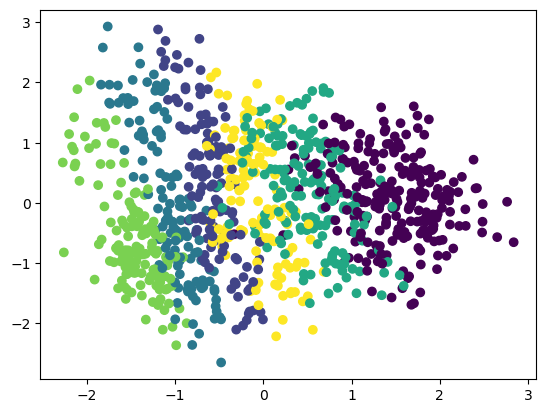

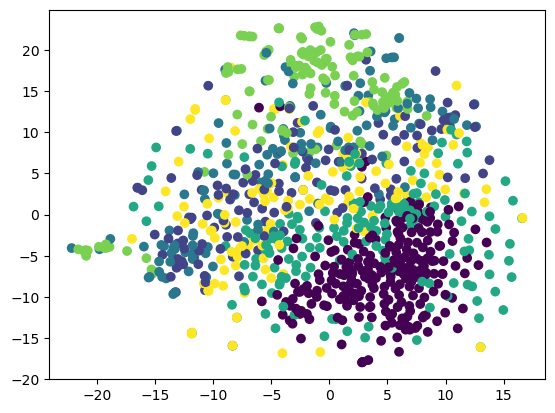

In [162]:
X_tsne = TSNE(n_components=2, random_state=33).fit_transform(np.array(list(df_add.semantic)))
X_pca = PCA(n_components=2).fit_transform(np.array(list(df_add.semantic)))
plt.scatter(X_pca[:, 0], X_pca[:, 1], c=sem_label)
plt.show()
plt.scatter(X_tsne[:, 0], X_tsne[:, 1], c=sem_label)
plt.show()

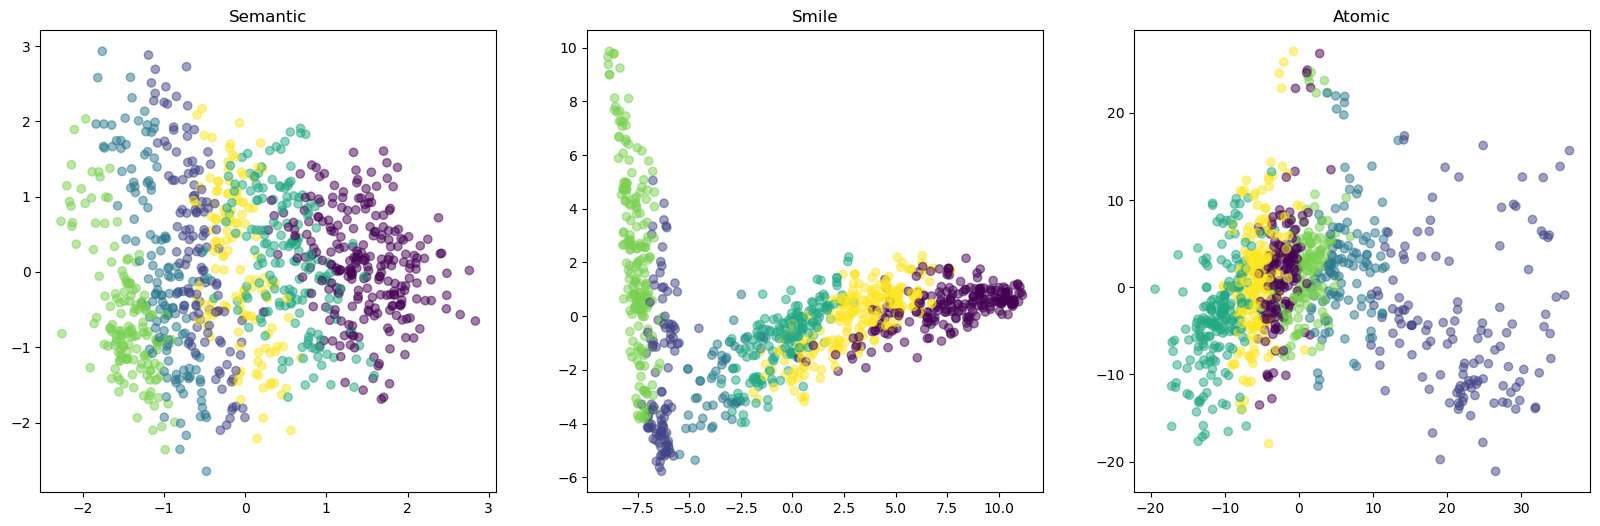

In [165]:
X1_pca = PCA(n_components=2).fit_transform(np.array(list(df_add.semantic)))
X2_pca = PCA(n_components=2).fit_transform(np.array(list(df_add.smile)))
X3_pca = PCA(n_components=2).fit_transform(np.array(list(df_add.atomic)))

fig, axes = plt.subplots(1, 3, figsize=(20, 6))
axes[0].set_title('Semantic')
axes[0].scatter(X1_pca[:, 0], X1_pca[:, 1], c=sem_label, alpha=0.5)
axes[1].set_title('Smile')
axes[1].scatter(X2_pca[:, 0], X2_pca[:, 1], c=smi_label, alpha=0.5)
axes[2].set_title('Atomic')
axes[2].scatter(X3_pca[:, 0], X3_pca[:, 1], c=ato_label, alpha=0.5)
plt.show()

Atomic not align well with semantic
Functionality
Drug dataset

Prediction based on eigenvalue

word_cnt = []
sem = []
smi = []
ato = []

for i in np.arange(0, 8500, 500):
    name_list = df_decomp[df_decomp.word_freq >= i].name
    word_cnt.append(len(name_list))
    sem_label_new = spect_clustering(df_sem.loc[name_list, name_list], number=6)
    smi_label_new = spect_clustering(df_smi.loc[name_list, name_list], number=6)
    ato_label_new = spect_clustering(df_ato.loc[name_list, name_list], number=6)

    sem.append(adjusted_rand_score(df_decomp.loc[name_list].semantic_label, sem_label_new))
    smi.append(adjusted_rand_score(df_decomp.loc[name_list].smile_label, smi_label_new))
    ato.append(adjusted_rand_score(df_decomp.loc[name_list].atomic_label, ato_label_new))
plt.plot(np.arange(0, 8500, 500), sem, label="sem")
plt.plot(np.arange(0, 8500, 500), smi, label="smi")
plt.plot(np.arange(0, 8500, 500), ato, label="ato")
plt.xticks(np.arange(0, 8500, 500), rotation=30)
plt.legend()
plt.show()
#